In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
cmap = sns.color_palette('pastel')

In [2]:
us_mus_nodes = pd.read_csv('data/musician-graph/us_nodes.csv',converters={'histogram':json.loads})
us_mus_edges = pd.read_csv('data/musician-graph/us_edges.csv')

release_dat = pd.read_csv('data/musician-graph/us-musician-release.csv',
                            parse_dates=['release_date'])

### Preparing data for plotting!
We bin the artists into 5 groups depending on their follower count first, same thing with popularity

In [3]:
# us_mus_nodes['fol_logsqr'] = us_mus_nodes.followers.replace({0:1}).apply(lambda x: int(np.log(x)**1.6))

N_CAREER_GROUP = 5

grbinsize = len(us_mus_nodes)//N_CAREER_GROUP
gr_bins = [i for i in range(N_CAREER_GROUP) for _ in range(grbinsize)]
gr_bins += [N_CAREER_GROUP-1]*(len(us_mus_nodes)-len(gr_bins))
us_mus_nodes = us_mus_nodes.sort_values('followers')
us_mus_nodes['fol_bin'] = gr_bins
us_mus_nodes = us_mus_nodes.sort_values('popularity')
us_mus_nodes['pop_bin'] = gr_bins


### Making the plots. 

Looks like bins from both popularity and followers show the same trend of more release as we go up the bins.


In [6]:
len(us_mus_nodes.histogram.values[0])

20

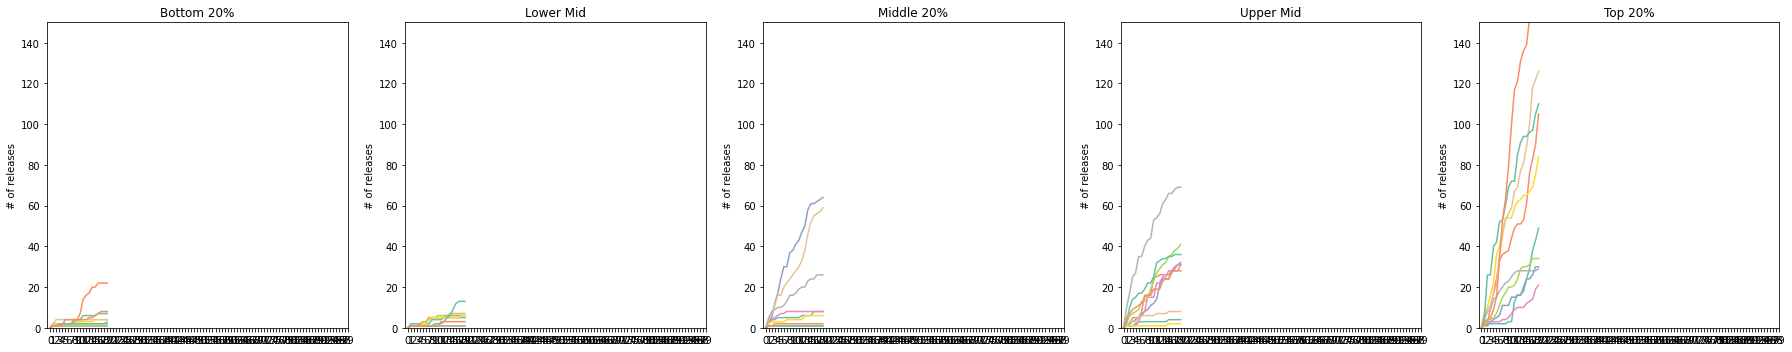

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(ncols=N_CAREER_GROUP,figsize=(25,5))
N_CAREER_BINS = len(us_mus_nodes.histogram.values[0])
# plt.figure(figsize=(15,5))

titles = [
    'Bottom 20%',
    'Lower Mid',
    'Middle 20%',
    'Upper Mid',
    'Top 20%'
]

for i in range(N_CAREER_GROUP):
    mm = us_mus_nodes[(us_mus_nodes.num_release>10) & (us_mus_nodes.pop_bin == i)][-10:]
    fig = sns.lineplot(data=mm.histogram.values.tolist(),ax=axes[i],legend=False,dashes=False,palette='Set2')
    fig.set(
        ylim=(0,150),
        # legend=False
        xticks = np.arange(N_CAREER_BINS),
        ylabel='# of releases',
        title=titles[i]
    )
    
plt.tight_layout()

fig.get_figure().savefig('pics/features/release_trend_pop_bin.png',dpi=300)

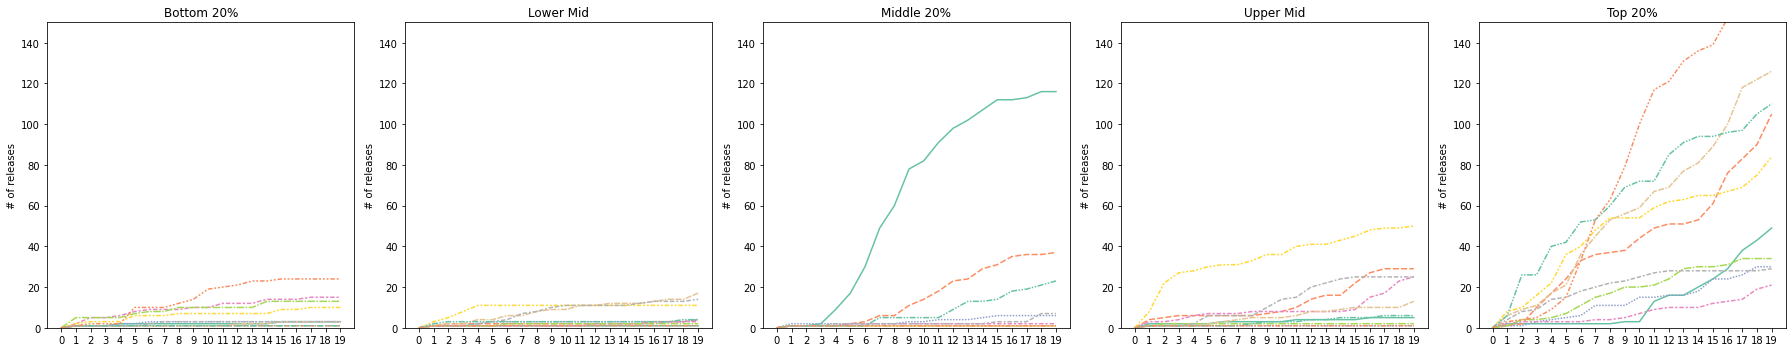

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axes = plt.subplots(ncols=N_CAREER_GROUP,figsize=(25,5))
# plt.figure(figsize=(15,5))

titles = [
    'Bottom 20%',
    'Lower Mid',
    'Middle 20%',
    'Upper Mid',
    'Top 20%'
]

for i in range(N_CAREER_GROUP):
    mm = us_mus_nodes[(us_mus_nodes.num_release>10) & (us_mus_nodes.fol_bin == i)][-10:]
    fig = sns.lineplot(data=mm.histogram.values.tolist(),ax=axes[i],legend=False,palette='Set2')
    fig.set(
        ylim=(0,150),
        # legend=False
        xticks = np.arange(N_CAREER_BINS),
        ylabel='# of releases',
        title=titles[i]
    )
    
plt.tight_layout()

fig.get_figure().savefig('pics/features/release_trend_fol_bin.png',dpi=300)